In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib
import xgboost as xgb
from sklearn import metrics
import numpy as np

In [2]:
filename= "/Users/isaiahpinto/PycharmProjects/pythonProject/Projects/Dairy Sales/dairy_dataset.csv"
orig_df = pd.read_csv(filename)
orig_df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,2022-02-16,2022-02-21,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,2022-03-22,2022-04-14,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,2020-01-04,2020-01-11,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2022-10-02,2022-10-09,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84


In [3]:
orig_df['Brand'].value_counts()

Brand
Amul                    1053
Mother Dairy            1010
Raj                      685
Sudha                    648
Dodla Dairy              222
Palle2patnam             211
Dynamix Dairies          106
Warana                   104
Parag Milk Foods         102
Passion Cheese            96
Britannia Industries      88
Name: count, dtype: int64

In [4]:
orig_df.isnull().sum()

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64

In [5]:
df = orig_df.copy()
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.strftime('%Y')
df['Month'] = df['Date'].dt.strftime('%m')
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year,Month
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,2022,02
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,2021,12
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83,2022,02
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,2019,06
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53,2022,02
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37,2022,05
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66,2020,01
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84,2022,10


## First let us analyze overall sales of Dairy

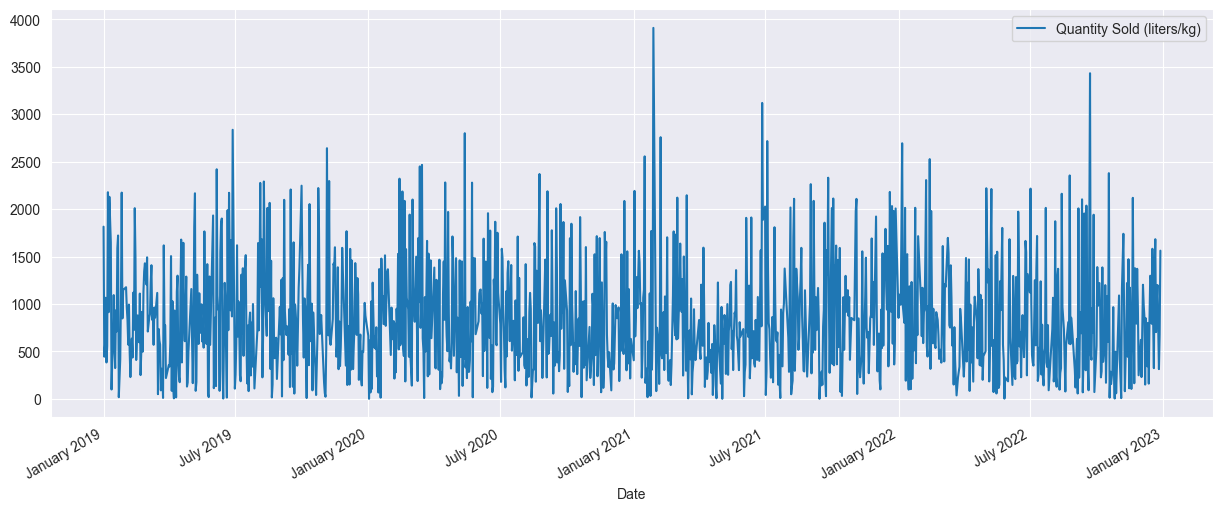

In [6]:
fig,axs = plt.subplots(1,1,figsize=(15,6))
df_sales = df[['Date','Quantity Sold (liters/kg)']]
df_sales = df_sales.groupby(['Date'],as_index=True).sum()
plot1 = df_sales.plot(kind='line',ax=axs)
plot1
date_format = mpl_dates.DateFormatter('%B %Y')
plt.gca().xaxis.set_major_formatter(date_format)

<Axes: ylabel='Frequency'>

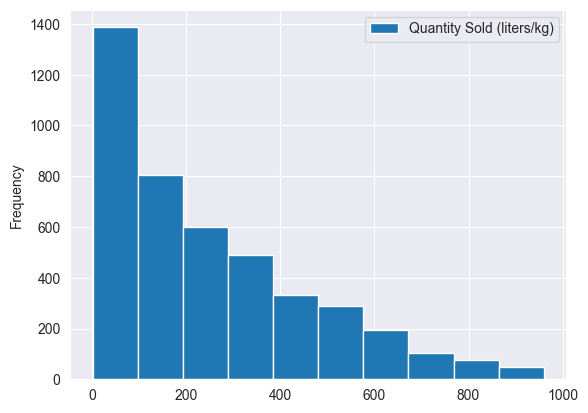

In [7]:
df_quantity = df[['Date','Quantity Sold (liters/kg)']]
df_quantity.plot(kind='hist')
#sns.histplot(data=df_quantity,x='Quantity Sold (liters/kg)', color='blue')

## What are the most sold brands

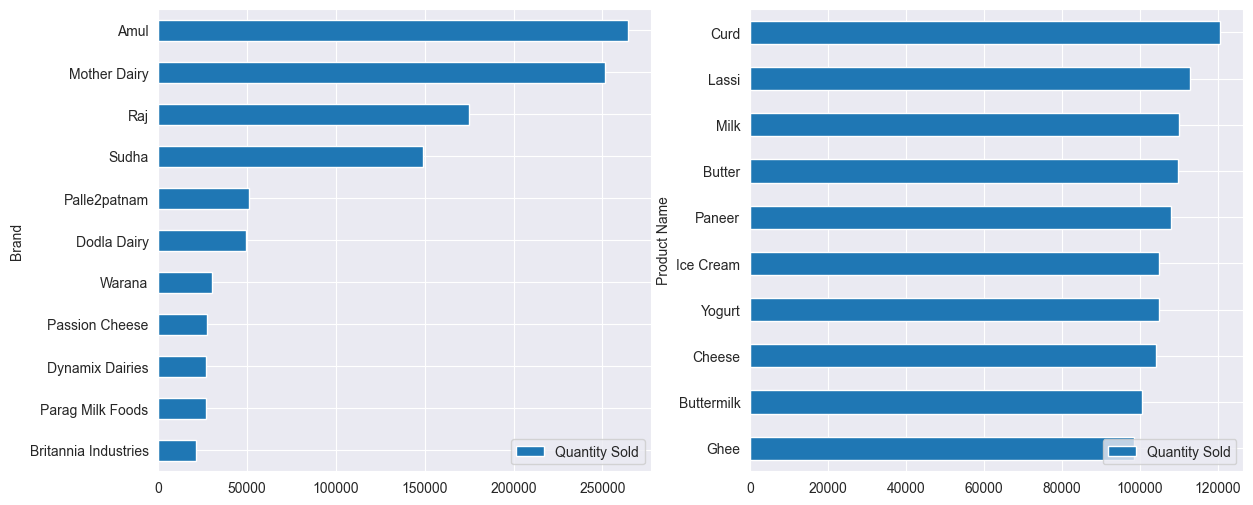

In [8]:
fig,axs = plt.subplots(1,2,figsize=(14,6))

df_brand = df[['Brand','Quantity Sold (liters/kg)']]
df_brand = df_brand.groupby(['Brand'],as_index=True).sum()
df_brand.sort_values('Quantity Sold (liters/kg)',ascending=False,inplace=True)
df_brand.plot(kind='barh',ax=axs[0])
axs[0].legend(['Quantity Sold'],loc='lower right')
axs[0].invert_yaxis()

df_product = df[['Product Name', 'Quantity Sold (liters/kg)']]
df_product = df_product.groupby(['Product Name'],as_index=True).sum()
df_product.sort_values('Quantity Sold (liters/kg)',ascending=False,inplace=True)
df_product.plot(kind='barh',ax=axs[1])
axs[1].legend(['Quantity Sold'],loc='lower right')
axs[1].invert_yaxis()

Top 5 Most Sold Products by Brand

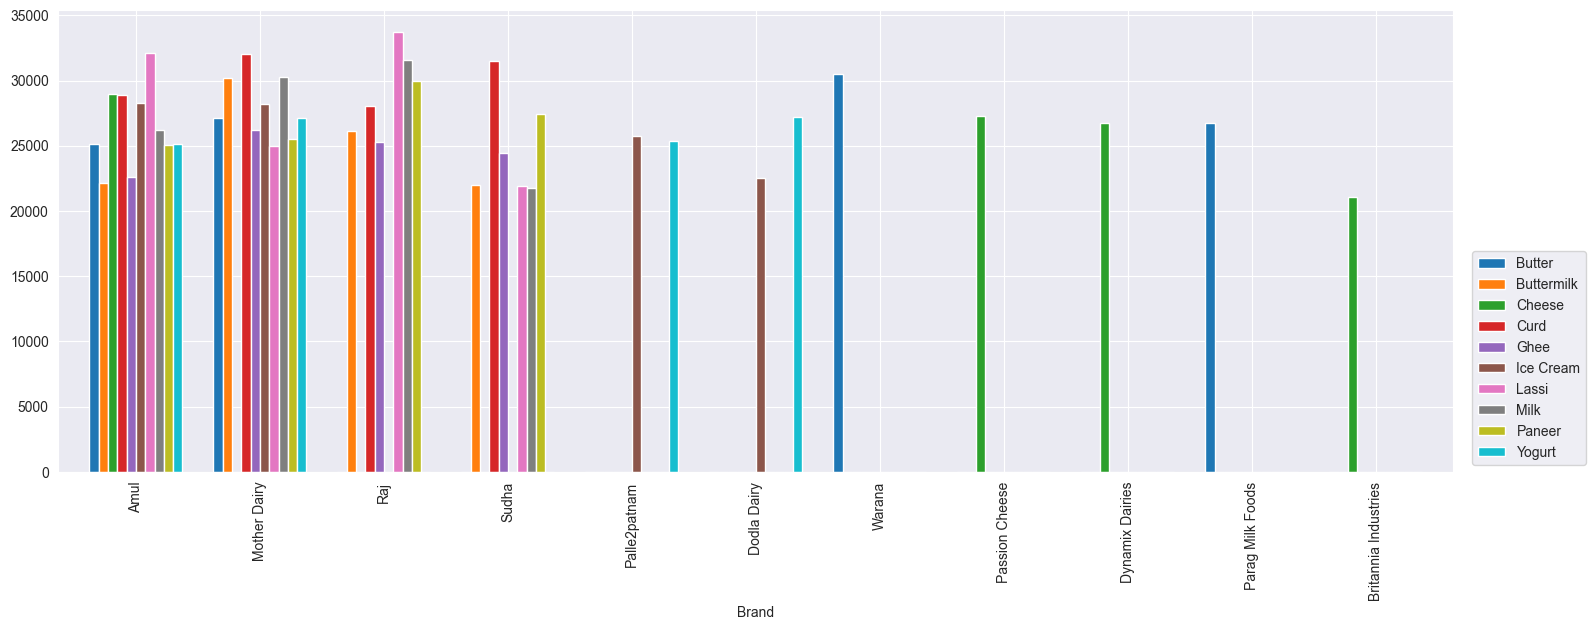

In [9]:
fig,axs = plt.subplots(1,1,figsize=(18,6))
df_product_brand = df[['Product Name','Brand','Quantity Sold (liters/kg)']]
df_product_brand = df_product_brand.groupby(['Brand','Product Name'],as_index=False).sum()
df_product_brand_pivot = df_product_brand.pivot(index='Brand',columns = 'Product Name',values = 'Quantity Sold (liters/kg)')
df_product_brand_pivot = df_product_brand_pivot.fillna(0)
df_product_brand_pivot['Total'] = df_product_brand_pivot.sum(axis=1)
df_product_brand_pivot.sort_values('Total',ascending=False,inplace=True)
df_product_brand_pivot.drop(columns=['Total'],inplace=True)
df_product_brand_pivot.plot(kind='bar',width=.75,ax=axs).legend(bbox_to_anchor=(1.10,0), loc='lower right')

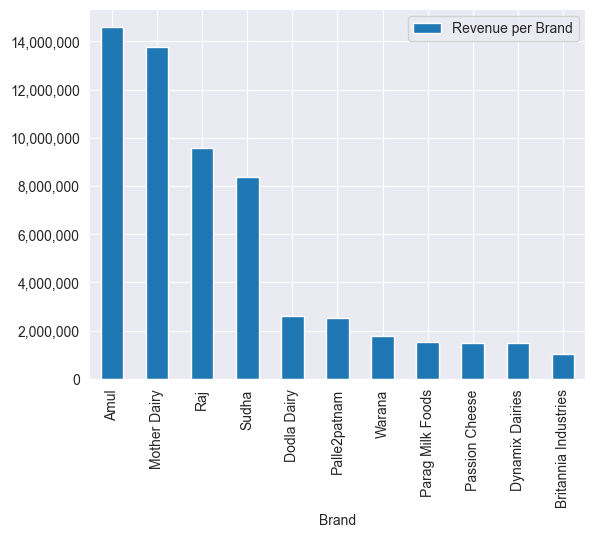

In [10]:
fig,axs = plt.subplots(1,1)
df_brand_revenue = df[['Brand','Approx. Total Revenue(INR)']]
df_brand_revenue = df_brand_revenue.groupby(['Brand'],as_index=True).sum()
df_brand_revenue.sort_values('Approx. Total Revenue(INR)',ascending=False,inplace=True)
df_brand_revenue.plot(kind='bar',ax=axs)
axs.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axs.legend(['Revenue per Brand'])

Now that we have broken down sales and revenue for Dairy products, next we will see demographics, and size of farms

<Axes: ylabel='Frequency'>

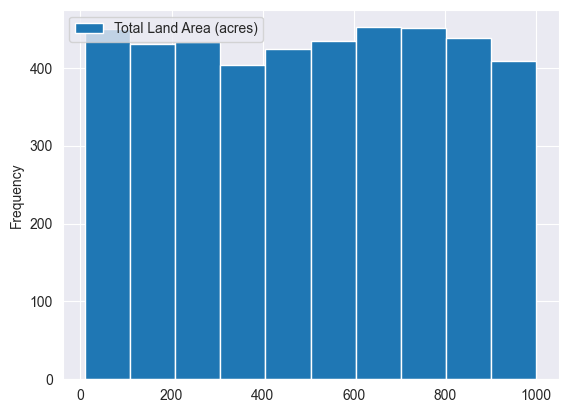

In [11]:
df[['Total Land Area (acres)']].plot(kind='hist')


What is the main difference of the farm sizes?

Number of Cows    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

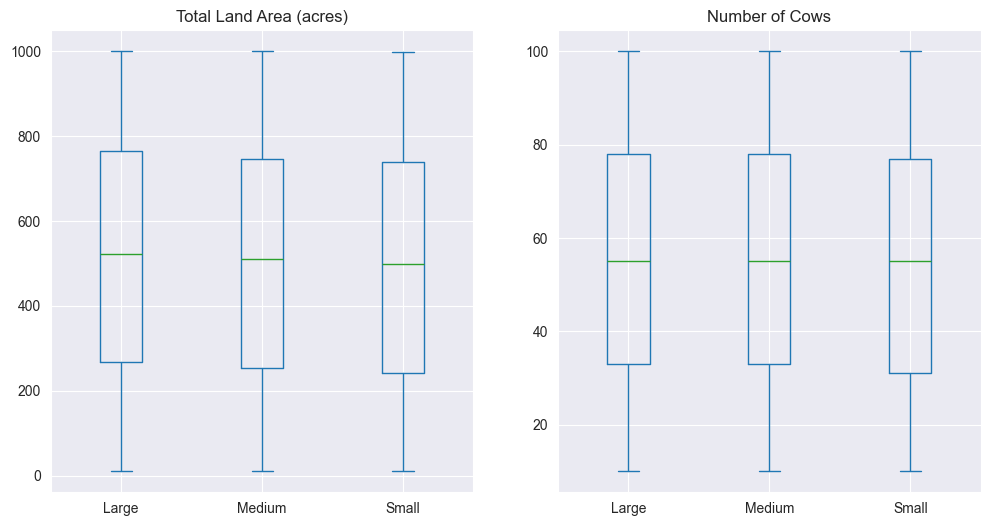

In [12]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
df_farmarea = df[['Total Land Area (acres)','Farm Size']]
df_farmarea.plot(kind='box',by='Farm Size',ax=axs[0])

df_cows = df[['Number of Cows','Farm Size']]
df_cows.plot(kind='box',by='Farm Size',ax=axs[1])

<Axes: xlabel='Brand'>

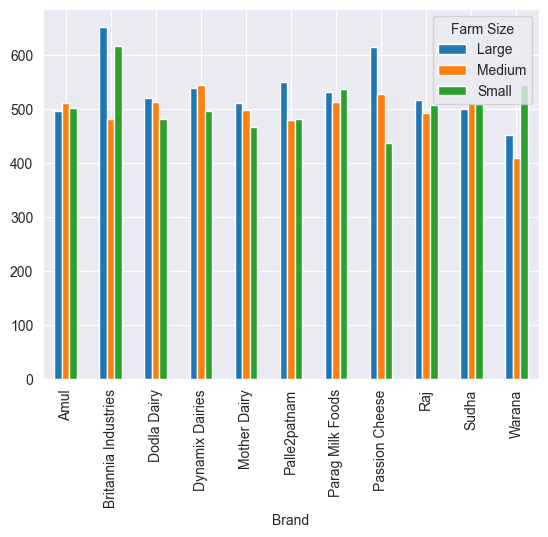

In [13]:
df_brand_size = df[['Brand','Farm Size','Total Land Area (acres)']]
df_brand_size = df_brand_size.groupby(['Brand','Farm Size'],as_index=False).mean()
df_brand_size.pivot(index='Brand', columns = 'Farm Size',values='Total Land Area (acres)').plot(kind='bar')

Conclusion: There are no clear differences between the 3 farm sizes

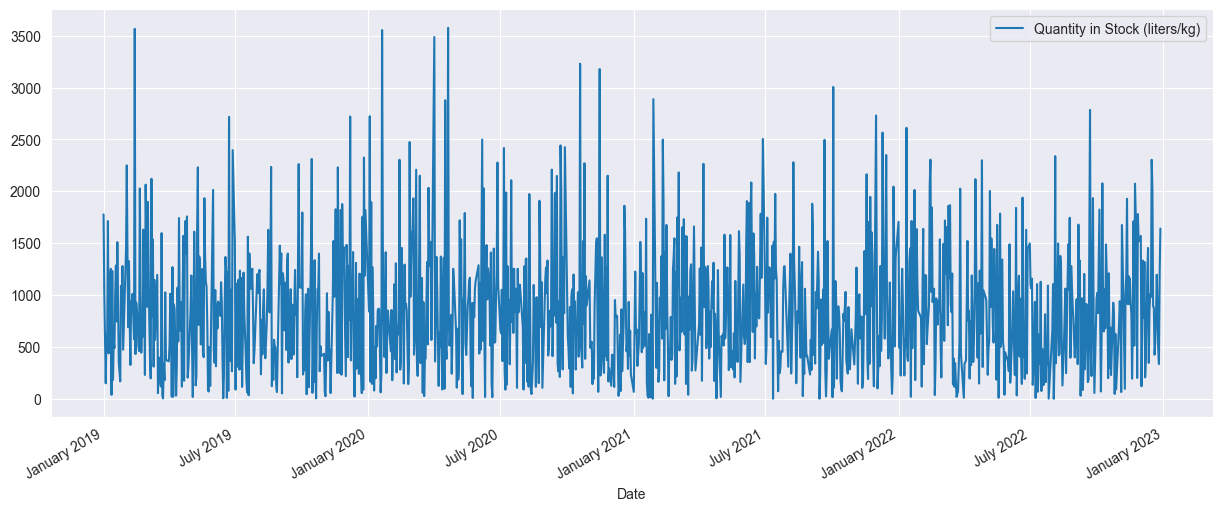

In [14]:
fig,axs = plt.subplots(1,1,figsize=(15,6))
df_inventory = df[['Date','Brand','Product Name','Quantity in Stock (liters/kg)']]
df_total_inventory = df_inventory[['Date','Quantity in Stock (liters/kg)']]
df_total_inventory = df_total_inventory.groupby(['Date'],as_index=True).sum()
df_total_inventory.plot(kind='line',ax=axs)
date_format = mpl_dates.DateFormatter('%B %Y')
plt.gca().xaxis.set_major_formatter(date_format)

In [15]:
df_total_inventory_zero =df_total_inventory.loc[df_total_inventory['Quantity in Stock (liters/kg)']==0]
df_total_inventory_zero

,Quantity in Stock (liters/kg)
Date,
2022-08-03,0


In [16]:
#productlist = ['Cheese', 'Ghee', 'Ice Cream', 'Lassi', 'Paneer', 'Buttermilk','Curd', 'Butter', 'Milk', 'Yogurt']
#df_product_inventory = df_inventory[['Date','Product Name','Quantity in Stock (liters/kg)']]
#df_product_inventory = df_product_inventory.groupby(['Date','Product Name'],as_index=False).sum()
#df_product_inventory_pivot = df_product_inventory.pivot(index='Date',columns='Product Name',values='Quantity in Stock (liters/kg)')
#df_product_inventory_pivot.plot(kind= 'line',subplots=True,layout=(len(productlist),1),figsize=(10,25))
#date_format = mpl_dates.DateFormatter('%B %Y')
#plt.gca().xaxis.set_major_formatter(date_format)

Check Highest Sales Customer Location

In [17]:
df_customer_sales = df[['Customer Location','Sales Channel','Quantity Sold (liters/kg)','Approx. Total Revenue(INR)']]

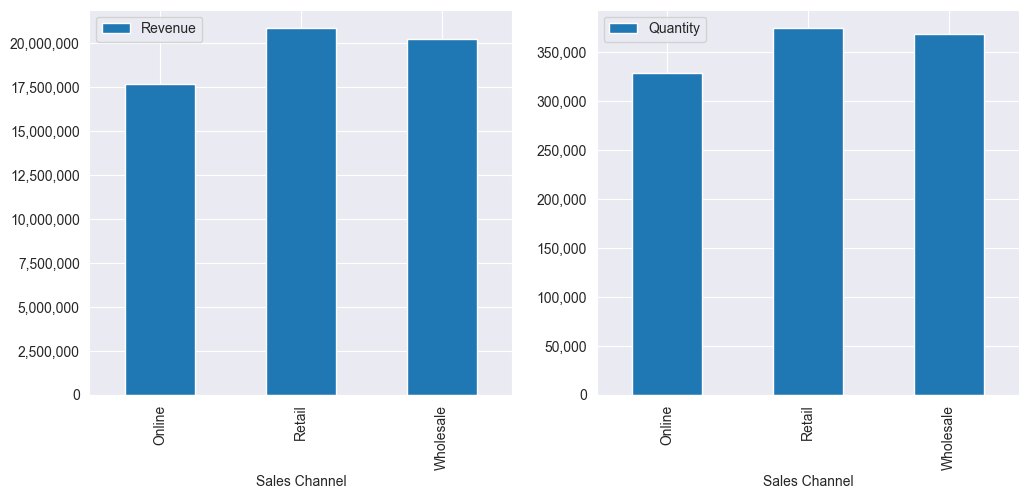

In [18]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
df_revenue_per_channel = df_customer_sales[['Sales Channel','Approx. Total Revenue(INR)']].groupby(['Sales Channel'],as_index=True).sum()
df_revenue_per_channel.plot(kind='bar',ax=axs[0]).legend(loc='upper left')
axs[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axs[0].legend(['Revenue'])

df_volume_per_channel = df_customer_sales[['Sales Channel','Quantity Sold (liters/kg)']].groupby(['Sales Channel'],as_index=True).sum()
df_volume_per_channel.plot(kind='bar',ax=axs[1]).legend(loc='upper left')
axs[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axs[1].legend(['Quantity'])


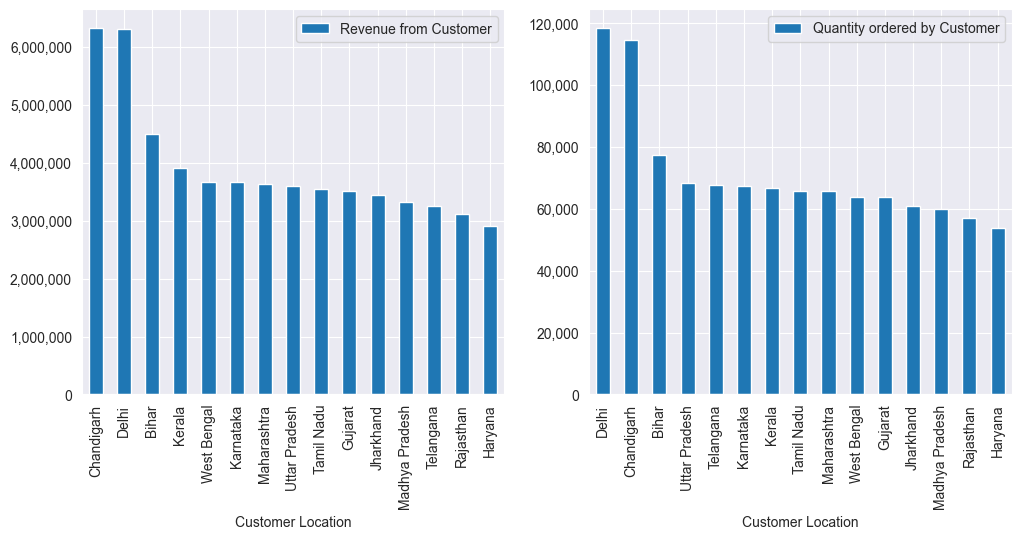

In [19]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
df_revenue_per_location = df_customer_sales[['Customer Location','Approx. Total Revenue(INR)']].groupby(['Customer Location'],as_index=True).sum()
df_revenue_per_location.sort_values('Approx. Total Revenue(INR)',ascending=False).plot(kind='bar',ax=axs[0]).legend(loc='upper left')
axs[0].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axs[0].legend(['Revenue from Customer'])

df_volume_per_location = df_customer_sales[['Customer Location','Quantity Sold (liters/kg)']].groupby(['Customer Location'],as_index=True).sum()
df_volume_per_location.sort_values('Quantity Sold (liters/kg)',ascending=False).plot(kind='bar',ax=axs[1]).legend(loc='upper left')
axs[1].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axs[1].legend(['Quantity ordered by Customer'])

In [20]:
df

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Year,Month
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03,2022,02
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10,2021,12
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83,2022,02
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68,2019,06
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,Delhi,748.71,89,Medium,2022-02-24,6,Curd,Mother Dairy,554.90,88.45,...,352,87.20,30694.40,Uttar Pradesh,Online,202,98.07,33.53,2022,02
4321,Jharkhand,385.91,29,Large,2022-05-14,4,Yogurt,Palle2patnam,818.33,55.35,...,68,58.39,3970.52,Kerala,Retail,750,87.41,114.37,2022,05
4322,Chandigarh,311.54,65,Small,2020-01-05,6,Curd,Mother Dairy,583.56,92.61,...,141,89.46,12613.86,Haryana,Retail,442,33.47,153.66,2020,01
4323,Maharashtra,890.55,90,Small,2022-10-25,6,Curd,Raj,3.10,15.30,...,2,10.56,21.12,Jharkhand,Wholesale,1,58.25,160.84,2022,10


Time Series Forecasting

<Axes: xlabel='Date'>

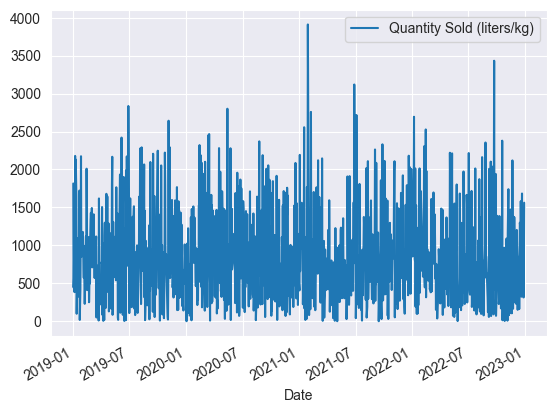

In [21]:
df_forecasting = df[['Date','Quantity Sold (liters/kg)']]
df_forecasting = df_forecasting.groupby(['Date'],as_index=True).sum()
df_forecasting.plot(kind='line')

In [22]:
from sklearn.model_selection import TimeSeriesSplit

In [23]:
df_forecasting

,Quantity Sold (liters/kg)
Date,
2019-01-01,1815
2019-01-02,445
2019-01-03,566
2019-01-04,1066
2019-01-05,384
...,...
2022-12-24,1200
2022-12-25,747
2022-12-26,314


In [24]:
tss = TimeSeriesSplit(n_splits = 5, test_size=120, gap = 1)
df_forecasting = df_forecasting.sort_index()

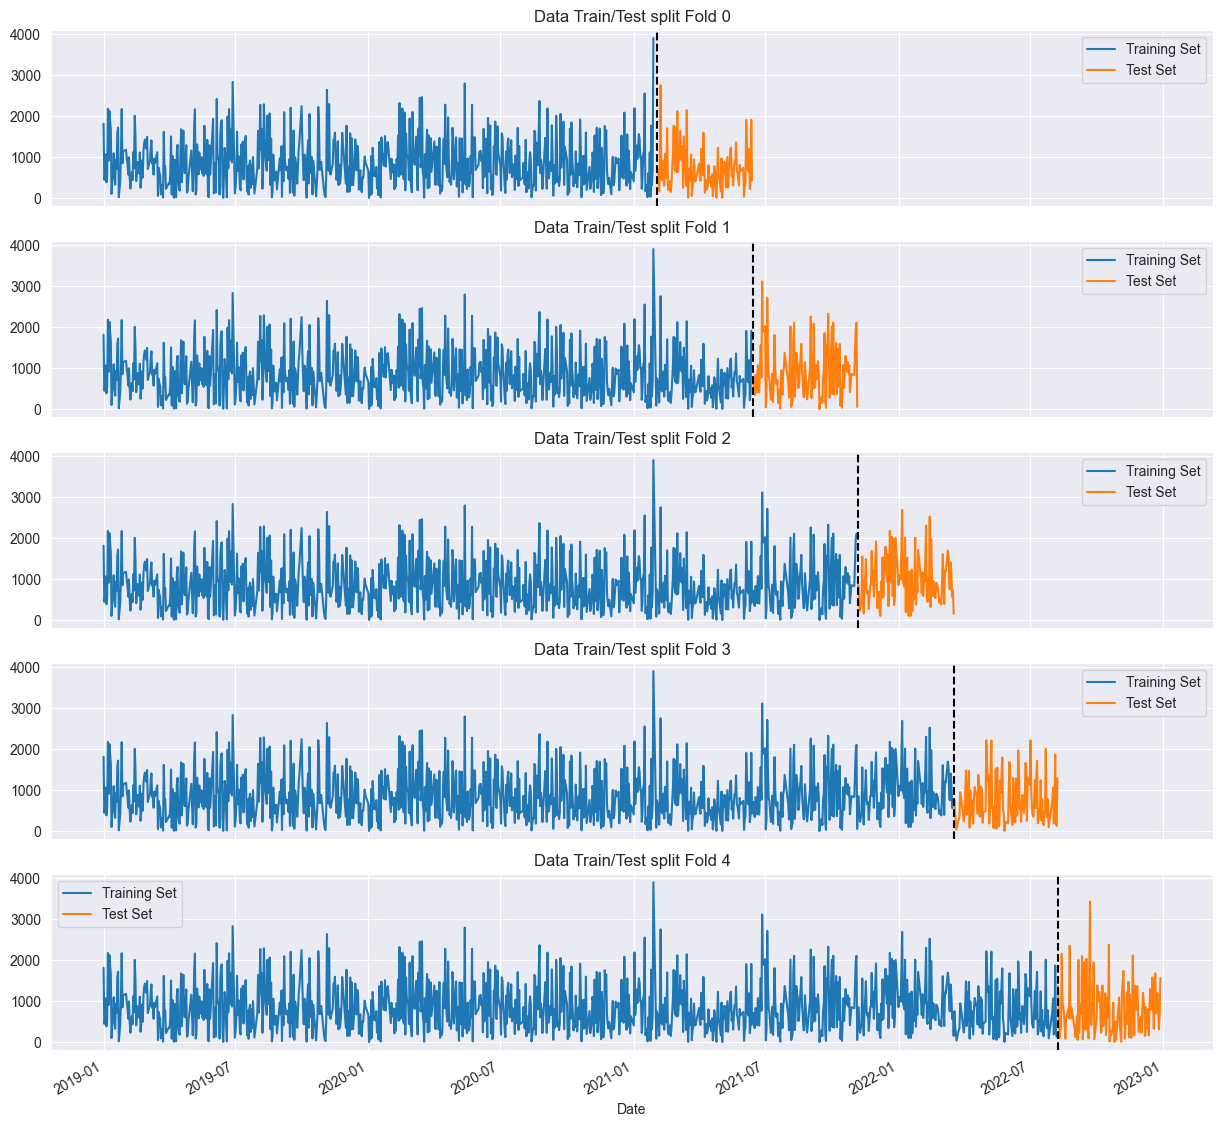

In [43]:
fig,axs = plt.subplots(5,1,figsize=(15,15), sharex=True)
fold = 0

for train_idx,val_idx in tss.split(df_forecasting):
    train = df_forecasting.iloc[train_idx]
    test= df_forecasting.iloc[val_idx]
    train['Quantity Sold (liters/kg)'].plot(ax=axs[fold], title = f'Data Train/Test split Fold {fold}')
    test['Quantity Sold (liters/kg)'].plot(ax=axs[fold])
    axs[fold].axvline(test.index.min(),color='black', ls='--')
    axs[fold].legend(['Training Set','Test Set'])
    fold += 1
plt.show()

In [26]:
def create_features(df_forecasting):
    df_forecasting = df_forecasting.copy()
    df_forecasting['Hour']=df_forecasting.index.hour
    df_forecasting['DayOfWeek'] = df_forecasting.index.dayofweek
    df_forecasting['Quarter'] = df_forecasting.index.quarter
    df_forecasting['Month'] = df_forecasting.index.month
    df_forecasting['Year']  =df_forecasting.index.year
    df_forecasting['DayofYear']=df_forecasting.index.dayofyear
    df_forecasting['DayofMonth'] = df_forecasting.index.day
    df_forecasting['WeekofYear'] = df_forecasting.index.isocalendar().week
    return df_forecasting

df_forecasting = create_features(df_forecasting)

    

In [27]:
df_forecasting

,Quantity Sold (liters/kg),Hour,DayOfWeek,Quarter,Month,Year,DayofYear,DayofMonth,WeekofYear
Date,,,,,,,,,
2019-01-01,1815,0,1,1,1,2019,1,1,1
2019-01-02,445,0,2,1,1,2019,2,2,1
2019-01-03,566,0,3,1,1,2019,3,3,1
2019-01-04,1066,0,4,1,1,2019,4,4,1
2019-01-05,384,0,5,1,1,2019,5,5,1
...,...,...,...,...,...,...,...,...,...
2022-12-24,1200,0,5,4,12,2022,358,24,51
2022-12-25,747,0,6,4,12,2022,359,25,51
2022-12-26,314,0,0,4,12,2022,360,26,52


Lag Features

In [28]:
target_map = df_forecasting['Quantity Sold (liters/kg)'].to_dict() # will be used for mapping the lag features

In [29]:
def add_lags(df_forecasting):
    df_forecasting['Lag1'] = (df_forecasting.index - pd.Timedelta('30 days')).map(target_map) #divisible if 364 by seven and cannot be longer than your forecasting horizon
    df_forecasting['Lag2'] = (df_forecasting.index - pd.Timedelta('60 days')).map(target_map)
    df_forecasting['Lag3'] = (df_forecasting.index - pd.Timedelta('90 days')).map(target_map)
    return df_forecasting

In [30]:
df_forecasting = add_lags(df_forecasting)
df_forecasting

,Quantity Sold (liters/kg),Hour,DayOfWeek,Quarter,Month,Year,DayofYear,DayofMonth,WeekofYear,Lag1,Lag2,Lag3
Date,,,,,,,,,,,,
2019-01-01,1815,0,1,1,1,2019,1,1,1,NaN,NaN,NaN
2019-01-02,445,0,2,1,1,2019,2,2,1,NaN,NaN,NaN
2019-01-03,566,0,3,1,1,2019,3,3,1,NaN,NaN,NaN
2019-01-04,1066,0,4,1,1,2019,4,4,1,NaN,NaN,NaN
2019-01-05,384,0,5,1,1,2019,5,5,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-24,1200,0,5,4,12,2022,358,24,51,NaN,288.0,958.0
2022-12-25,747,0,6,4,12,2022,359,25,51,793.0,4.0,698.0
2022-12-26,314,0,0,4,12,2022,360,26,52,1371.0,497.0,1941.0


In [31]:
df_forecasting.columns

Index(['Quantity Sold (liters/kg)', 'Hour', 'DayOfWeek', 'Quarter', 'Month',
       'Year', 'DayofYear', 'DayofMonth', 'WeekofYear', 'Lag1', 'Lag2',
       'Lag3'],
      dtype='object')

In [32]:
from sklearn.metrics import mean_squared_error

fold = 0
preds = []
scores = []
for train_idx,val_idx in tss.split(df_forecasting):
    train = df_forecasting.iloc[train_idx]
    test= df_forecasting.iloc[val_idx]
    
    train = create_features(train)
    test = create_features(test)
    
    features = ['Hour', 'DayOfWeek', 'Quarter', 'Month','Year', 'DayofYear', 'DayofMonth', 'WeekofYear', 'Lag1', 'Lag2','Lag3']
    target = 'Quantity Sold (liters/kg)'
    
    x_train = train[features]
    y_train = train[target]
    
    x_test = test[features]
    y_test = test[target]
    
    reg = xgb.XGBRegressor(base_score = 0.5, booster = 'gbtree',
                           n_estimators = 1000,
                           early_stopping_rounds = 50,
                           objective = 'reg:linear',
                           max_depth = 3,
                           learning_rate = 0.01)
    reg.fit(x_train, y_train, eval_set=[(x_train,y_train),(x_test,y_test)],verbose = 100)
    
    y_pred = reg.predict(x_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test,y_pred))
    scores.append(score)
    

[0]	validation_0-rmse:1031.60180	validation_1-rmse:865.63037
[100]	validation_0-rmse:644.63282	validation_1-rmse:515.72636


/Library/Python/3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgb

[200]	validation_0-rmse:557.75328	validation_1-rmse:493.75163
[205]	validation_0-rmse:555.75366	validation_1-rmse:494.28993
[0]	validation_0-rmse:1008.36184	validation_1-rmse:1085.82212
[100]	validation_0-rmse:630.39172	validation_1-rmse:757.48043


/Library/Python/3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgb

[200]	validation_0-rmse:548.07616	validation_1-rmse:690.81405
[300]	validation_0-rmse:525.29076	validation_1-rmse:677.23125
[400]	validation_0-rmse:511.82537	validation_1-rmse:676.17872
[500]	validation_0-rmse:501.38733	validation_1-rmse:675.89421
[509]	validation_0-rmse:500.67940	validation_1-rmse:675.95400
[0]	validation_0-rmse:1018.88095	validation_1-rmse:1099.19244
[100]	validation_0-rmse:645.67673	validation_1-rmse:695.88571


/Library/Python/3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgb

[200]	validation_0-rmse:567.45265	validation_1-rmse:604.58527
[300]	validation_0-rmse:547.84547	validation_1-rmse:584.27723
[400]	validation_0-rmse:537.54299	validation_1-rmse:579.20183
[500]	validation_0-rmse:528.08301	validation_1-rmse:578.49551
[529]	validation_0-rmse:525.26203	validation_1-rmse:579.06179
[0]	validation_0-rmse:1028.40251	validation_1-rmse:927.70835
[100]	validation_0-rmse:646.57287	validation_1-rmse:594.64779


/Library/Python/3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgb

[200]	validation_0-rmse:566.03821	validation_1-rmse:550.69847
[275]	validation_0-rmse:550.84545	validation_1-rmse:551.92508
[0]	validation_0-rmse:1017.80272	validation_1-rmse:1003.59031
[100]	validation_0-rmse:642.99898	validation_1-rmse:673.52749


/Library/Python/3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgb

[200]	validation_0-rmse:563.67657	validation_1-rmse:617.47236
[300]	validation_0-rmse:544.00326	validation_1-rmse:609.50694
[379]	validation_0-rmse:536.08654	validation_1-rmse:609.23319


/Library/Python/3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [33]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 580.6225
Fold scores:[490.47393067466277, 675.3978670878873, 578.3513118100715, 550.0325543213303, 608.8570301603485]


In [34]:
fi = pd.DataFrame(data= reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns = ['importance'])

<Axes: >

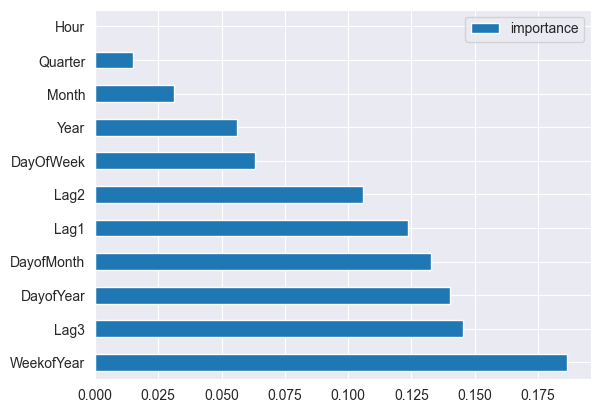

In [35]:
fi.sort_values('importance',ascending=False).plot(kind='barh')

Retrain all data

In [36]:
features = ['Hour', 'DayOfWeek', 'Quarter', 'Month','Year', 'DayofYear', 'DayofMonth', 'WeekofYear', 'Lag1', 'Lag2','Lag3']
target = 'Quantity Sold (liters/kg)'
    
x_all = df_forecasting[features]
y_all = df_forecasting[target]
    
reg = xgb.XGBRegressor(base_score = 0.5, booster = 'gbtree',
                        n_estimators = 350,
                        objective = 'reg:linear',
                        max_depth = 3,
                        learning_rate = 0.01)
reg.fit(x_all, y_all, eval_set=[(x_all,y_all)],verbose = 100)
    
    

[0]	validation_0-rmse:1016.73507
[100]	validation_0-rmse:646.80115


/Library/Python/3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgb

[200]	validation_0-rmse:568.92181
[300]	validation_0-rmse:550.01838
[349]	validation_0-rmse:544.89795


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=350, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [37]:
df_forecasting.index.max()

Timestamp('2022-12-28 00:00:00')

In [38]:
future = pd.date_range('2022-12-28 00:00:00', '2023-01-18 00:00:00')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
df_forecasting['isFuture'] = False
orig_and_future = pd.concat([df_forecasting,future_df])
orig_and_future = create_features(orig_and_future)
orig_and_future = add_lags(orig_and_future)

In [39]:
future_w_features = orig_and_future.query('isFuture').copy()

/Library/Python/3.9/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Library/Python/3.9/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Library/Python/3.9/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


<function matplotlib.pyplot.show(close=None, block=None)>

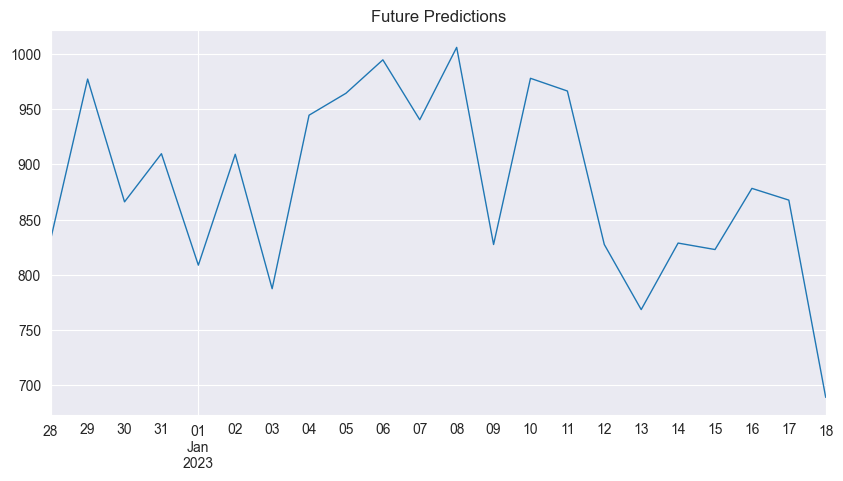

In [40]:
future_w_features['Predictions'] = reg.predict(future_w_features[features])
future_w_features['Predictions'].plot(figsize=(10,5),ms=1,lw=1,title='Future Predictions')
plt.show

In [41]:
future_w_features

,Quantity Sold (liters/kg),Hour,DayOfWeek,Quarter,Month,Year,DayofYear,DayofMonth,WeekofYear,Lag1,Lag2,Lag3,isFuture,Predictions
2022-12-28,NaN,0,2,4,12,2022,362,28,52,249.0,NaN,NaN,True,832.433044
2022-12-29,NaN,0,3,4,12,2022,363,29,52,NaN,NaN,NaN,True,977.349487
2022-12-30,NaN,0,4,4,12,2022,364,30,52,NaN,NaN,562.0,True,866.120239
2022-12-31,NaN,0,5,4,12,2022,365,31,52,622.0,1090.0,1389.0,True,909.742920
2023-01-01,NaN,0,6,1,1,2023,1,1,52,230.0,417.0,981.0,True,808.756348
2023-01-02,NaN,0,0,1,1,2023,2,2,1,NaN,209.0,1213.0,True,909.241089
2023-01-03,NaN,0,1,1,1,2023,3,3,1,1203.0,8.0,1221.0,True,787.430664
2023-01-04,NaN,0,2,1,1,2023,4,4,1,991.0,1165.0,958.0,True,944.614136
2023-01-05,NaN,0,3,1,1,2023,5,5,1,865.0,NaN,227.0,True,964.491394
2023-01-06,NaN,0,4,1,1,2023,6,6,1,151.0,1740.0,291.0,True,994.773438
